# **ASSUMPTIONS**


First, I will attentively analyze the factors and build my own dependencies, which I consider correct and have the most powerful correlation and influence between them.

In my opinion, the strongest correlation would be between pregnancies and levels of glucose because I know that there is a correlation between pregnancy and the risk of diabetes. I guess that the analysis would prove my opinion.

I will do data analysis visualization for easier understanding of the data and predictions.


In [17]:
import kagglehub
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:
path = kagglehub.dataset_download("nanditapore/healthcare-diabetes")

100%|██████████| 26.7k/26.7k [00:00<00:00, 11.1MB/s]

Extracting files...


In [5]:
files = os.listdir(path)
csv_files = [file for file in files if file.endswith('.csv')]
data_path = os.path.join(path, csv_files[0])  # Assuming there's one main dataset

In [6]:
df = pd.read_csv(data_path)

In [7]:
print("Dataset Overview:")
print(df.head())
print("\nMissing Values:\n", df.isnull().sum())

Dataset Overview:
   Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6      148             72             35        0  33.6   
1   2            1       85             66             29        0  26.6   
2   3            8      183             64              0        0  23.3   
3   4            1       89             66             23       94  28.1   
4   5            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Missing Values:
 Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age

# Data Cleaning and Preprocessing

I will drop the column Id for data analysis because it should not make any correlation between the factors.

The other valuable steps are cleaning and prepariong the data for use, graphs and clear visualisations.

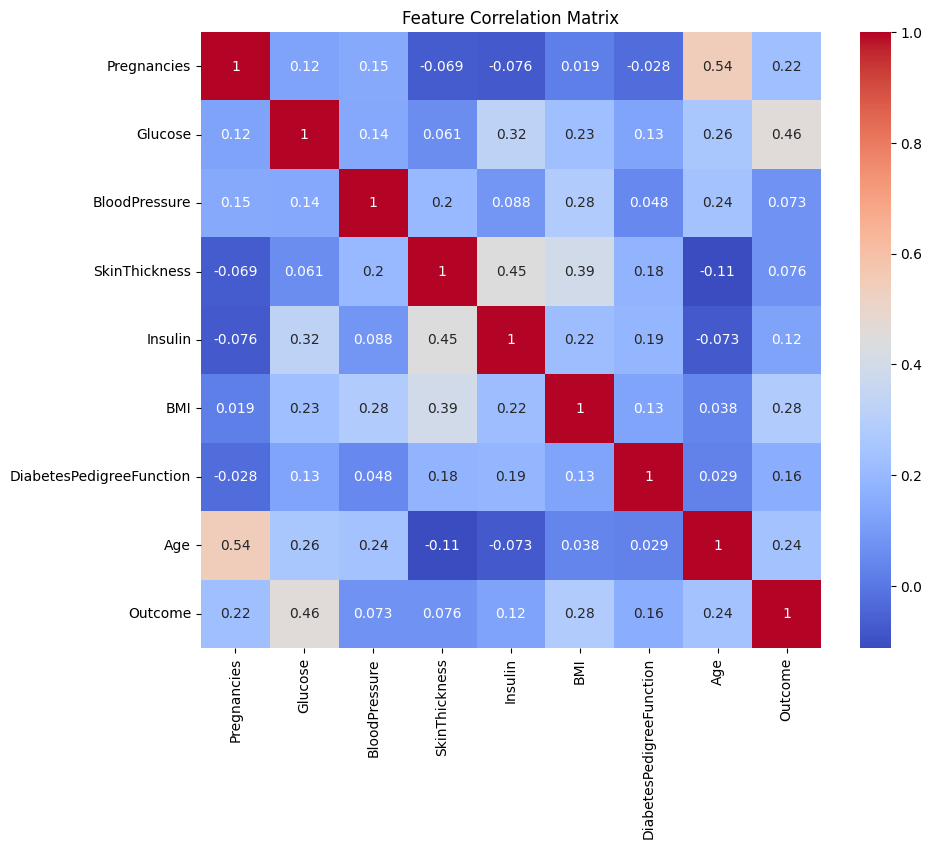

In [8]:
df.dropna(inplace=True)
df=df.drop(columns=["Id"])


categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

Correlation Matrix is a standart way to show dependences between the factors and there influence one over another factor

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

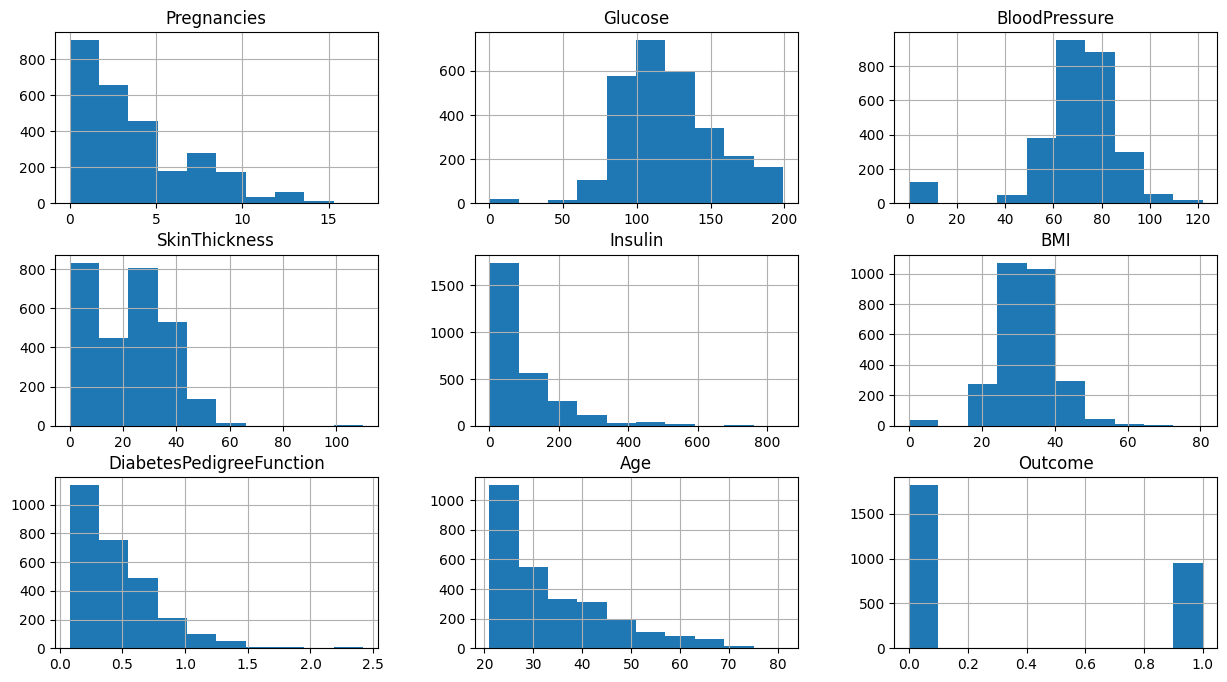

In [9]:
df.hist(figsize=(15, 8))

Pairplot to visualize dependencies can be used for more easier understatnding of correlations and influence between facctors.

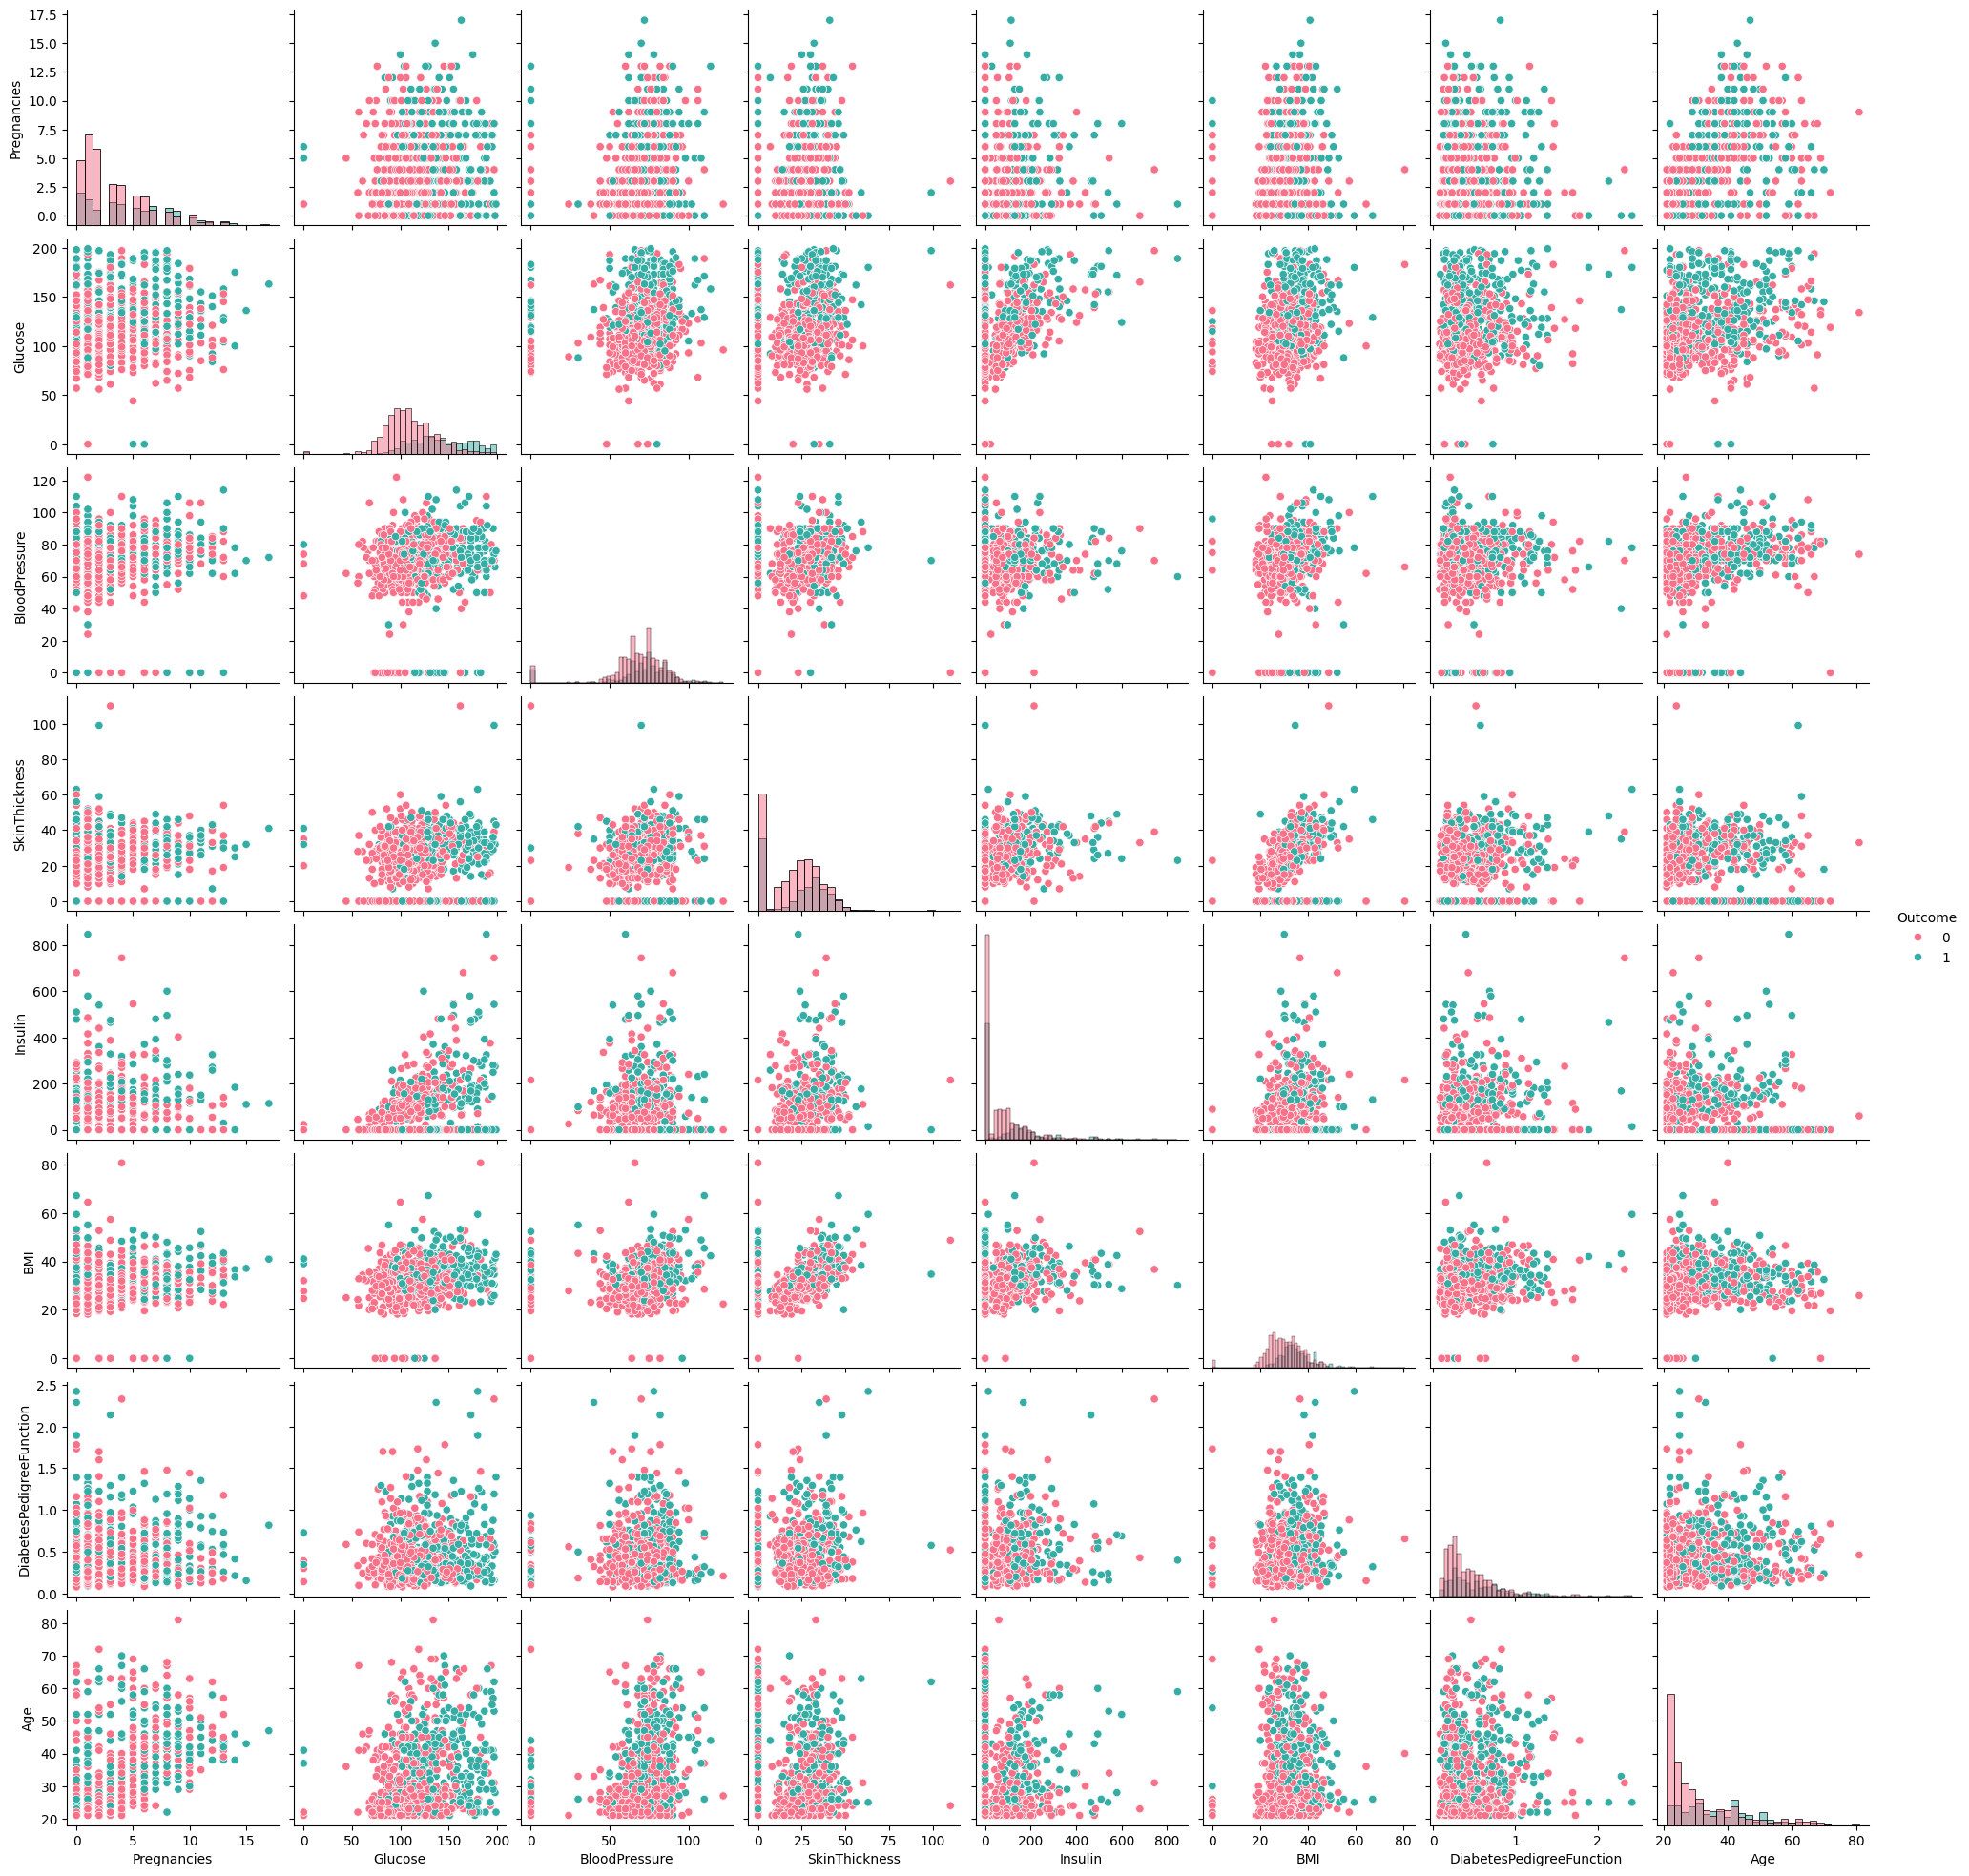

In [10]:
sns.pairplot(df, hue="Outcome", diag_kind='hist', palette="husl")
plt.show()

A boxplot provides a summary of a numerical feature’s distribution, including outliers. It helps in understanding the spread of data and finding potential extreme values that may need special handling

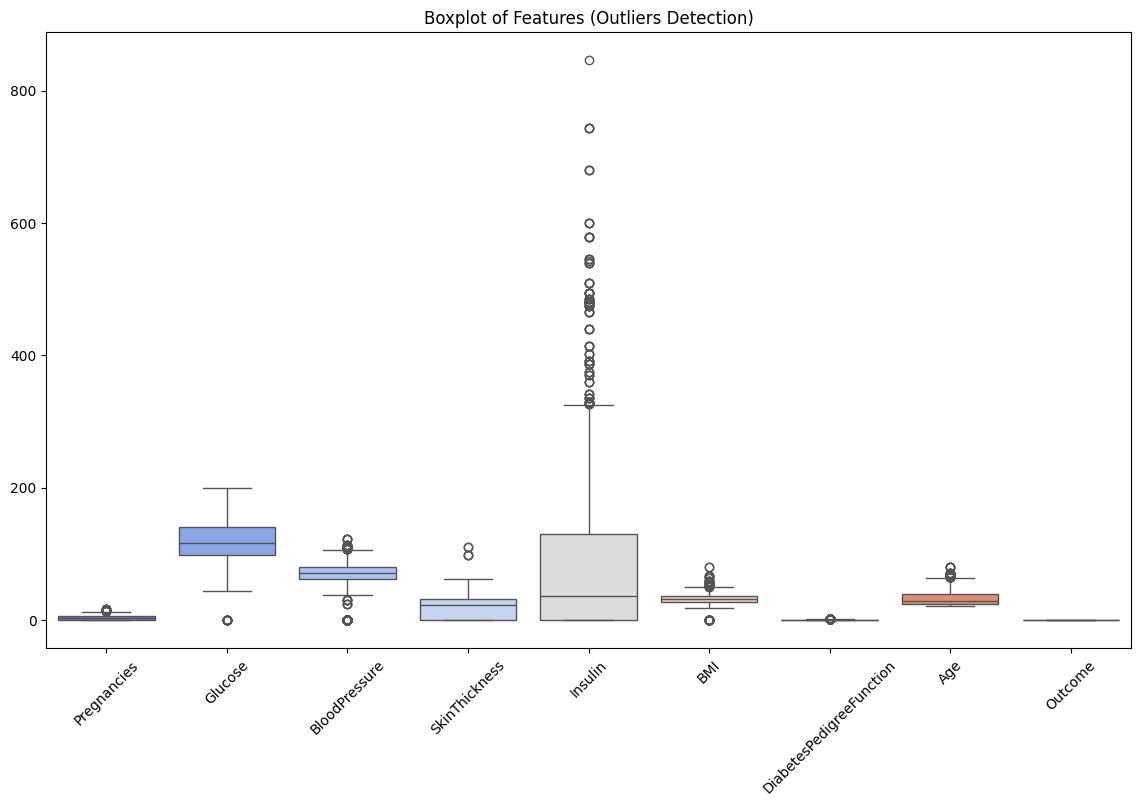

In [16]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Boxplot of Features (Outliers Detection)")
plt.show()

In [12]:
# Splitting data into X and Y
X = df.drop(columns=['Outcome'])  #Outcome there is or not
y = df['Outcome']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)





Model Accuracy: 0.9819494584837545


We can see a pretty good exaple on model accracy as the result.

In [13]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       367
           1       0.98      0.96      0.97       187

    accuracy                           0.98       554
   macro avg       0.98      0.98      0.98       554
weighted avg       0.98      0.98      0.98       554



Classification_report helps understand how well the model distinguishes between different classes

In [14]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[364   3]
 [  7 180]]


The confusion matrix helps us evaluate model mistakes and decide what to improve:


- If FP is high: Too many false alarms => Model needs better precision (avoid diagnosing healthy people as diabetic).

- If FN is high: Dangerous! The model is missing real diabetic cases => We need better recall.

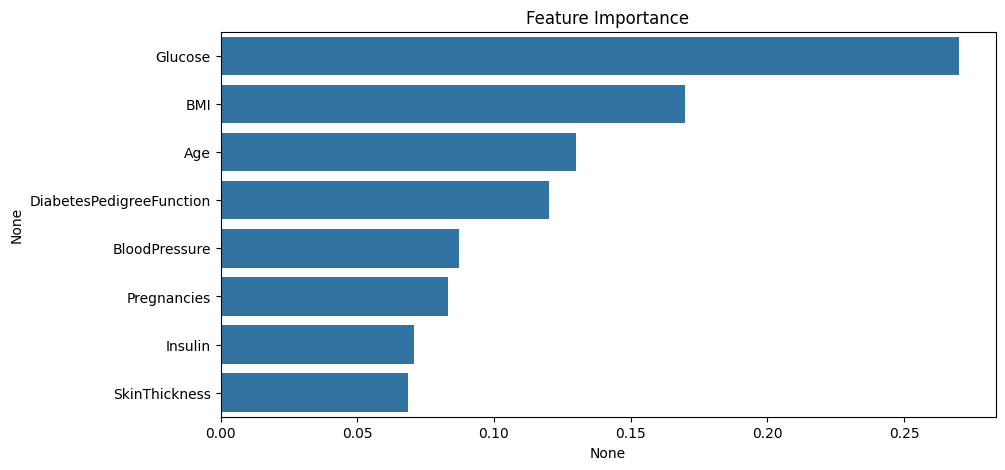

In [15]:
# Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Feature Importance")
plt.show()

# **CONCLUSION**

In the end, I can figure out a few dependencies:


If Glucose levels are strongly correlated with the outcome, it suggests that higher glucose levels are a strong predictor of diabetes.

If Body Mass Index and Insulin show some correlation, it may indicate that a higher Body Mass Index tends to be associated with insulin resistance.

If age is weakly correlated, it might mean that diabetes can occur at any age, though risk may increase with age.

I can tell that my assumptions were not accurate. The correlations between factors are more accurately described and visualized in tables.

That analysis can be applied for medical use. Especially in predicting risks.